In [1]:
#get some of the good stuff!!
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf
import tensorflow_decision_forests as tfdf

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split

sns.set(font_scale=1)
plt.style.use('ggplot')

#import csv
df = pd.read_csv('/kaggle/input/new-york-housing-market/NY-House-Dataset.csv')

print(f'train_df.shape = {df.shape}')

train_df.shape = (4801, 17)


In [2]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


# Data Cleaning

In [3]:
df = df.drop(['LONGITUDE', 'LATITUDE', 'FORMATTED_ADDRESS', 'LONG_NAME', 'STREET_NAME', 'ADMINISTRATIVE_AREA_LEVEL_2', 'MAIN_ADDRESS', 'STATE', 'ADDRESS', 'BROKERTITLE'], axis=1)
df.head()

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,LOCALITY,SUBLOCALITY
0,Condo for sale,315000,2,2.000000,1400.0,New York,Manhattan
1,Condo for sale,195000000,7,10.000000,17545.0,New York,New York County
2,House for sale,260000,4,2.000000,2015.0,New York,Richmond County
3,Condo for sale,69000,3,1.000000,445.0,New York,New York County
4,Townhouse for sale,55000000,7,2.373861,14175.0,New York,New York County


In [4]:
df.rename(columns = {'PRICE':'price', 'BEDS':'beds', 
                     'BATH':'bath', 'PROPERTYSQFT':'area', 'LOCALITY': 'place', 
                     'SUBLOCALITY':'sublocality', 'TYPE': "type"}, inplace = True) 
df['bath'] = df['bath'].apply(np.ceil)
df.head()

,type,price,beds,bath,area,place,sublocality
0,Condo for sale,315000,2,2.0,1400.0,New York,Manhattan
1,Condo for sale,195000000,7,10.0,17545.0,New York,New York County
2,House for sale,260000,4,2.0,2015.0,New York,Richmond County
3,Condo for sale,69000,3,1.0,445.0,New York,New York County
4,Townhouse for sale,55000000,7,3.0,14175.0,New York,New York County


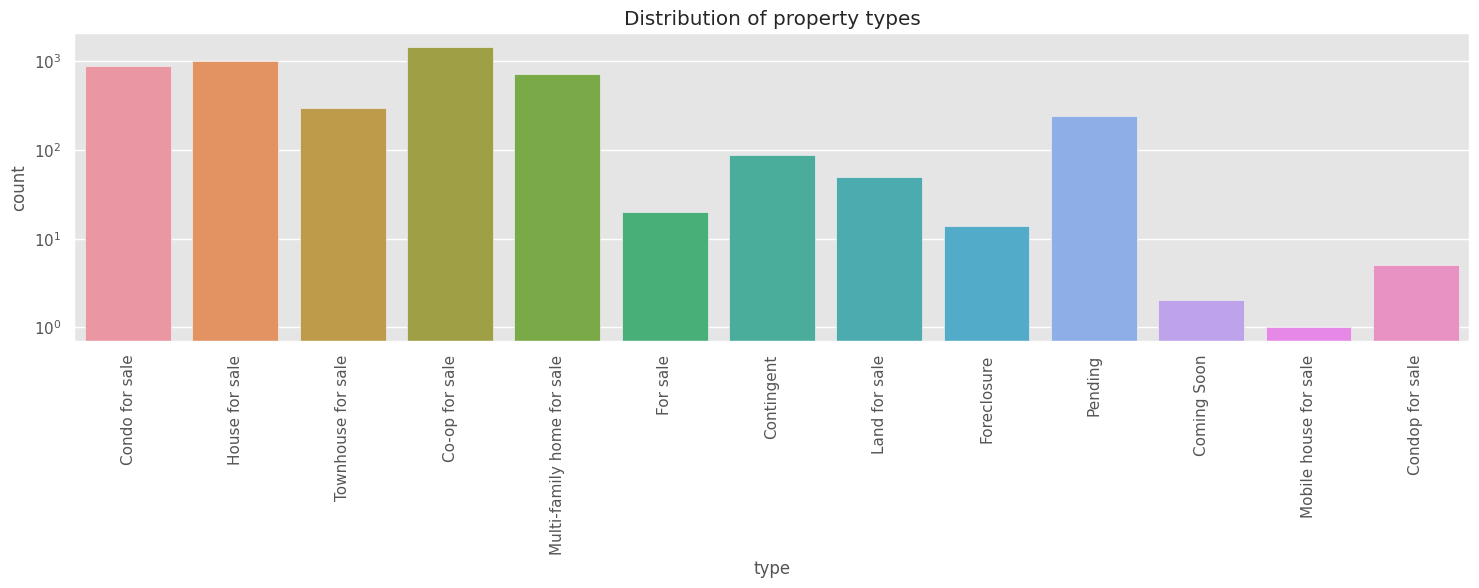

In [5]:


fig, ax = plt.subplots(figsize=(18, 4))
fig = sns.countplot(data=df, x='type', log=True)
plt.xticks(rotation=90)
plt.title('Distribution of property types')
plt.show()



In [6]:
df = df.drop(['type', 'place', 'sublocality'], axis=1)
df = df.drop(df[df['price'] == 2147483647].index)
df = df.drop(df[df['price'] == 195000000].index)
X = df.drop(['price'], axis=1)
y = df['price']

In [7]:
X_encoded = pd.get_dummies(X, columns=['bath',
                                       'beds'])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, 
                                                    y, 
                                                    random_state=42,)

In [9]:
clf_xgb_v1 = xgb.XGBRegressor(objective="reg:squarederror",
                            # missing=None,
                            seed=42)

clf_xgb_v1.fit(X_train,
            y_train,
            verbose=True,
            early_stopping_rounds=20,
            eval_metric='rmse',
            eval_set=[(X_test, y_test)])

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:4306923.34818
[1]	validation_0-rmse:4115886.13025
[2]	validation_0-rmse:4013062.54308
[3]	validation_0-rmse:3964086.62703
[4]	validation_0-rmse:3920905.47452
[5]	validation_0-rmse:3913600.15292
[6]	validation_0-rmse:3902785.16200
[7]	validation_0-rmse:3890883.26493
[8]	validation_0-rmse:3883540.52117
[9]	validation_0-rmse:3883087.73534
[10]	validation_0-rmse:3876298.75645
[11]	validation_0-rmse:3867683.12581
[12]	validation_0-rmse:3872075.08930
[13]	validation_0-rmse:3870679.71518
[14]	validation_0-rmse:3873105.69976
[15]	validation_0-rmse:3890323.67747
[16]	validation_0-rmse:3888767.62136
[17]	validation_0-rmse:3889365.95858
[18]	validation_0-rmse:3909460.94607
[19]	validation_0-rmse:3909001.99757
[20]	validation_0-rmse:3909105.33676
[21]	validation_0-rmse:3911076.34124
[22]	validation_0-rmse:3903557.85448
[23]	validation_0-rmse:3910474.92607
[24]	validation_0-rmse:3915822.50477
[25]	validation_0-rmse:3916319.66397
[26]	validation_0-rmse:3917702.49460
[27]	valida

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

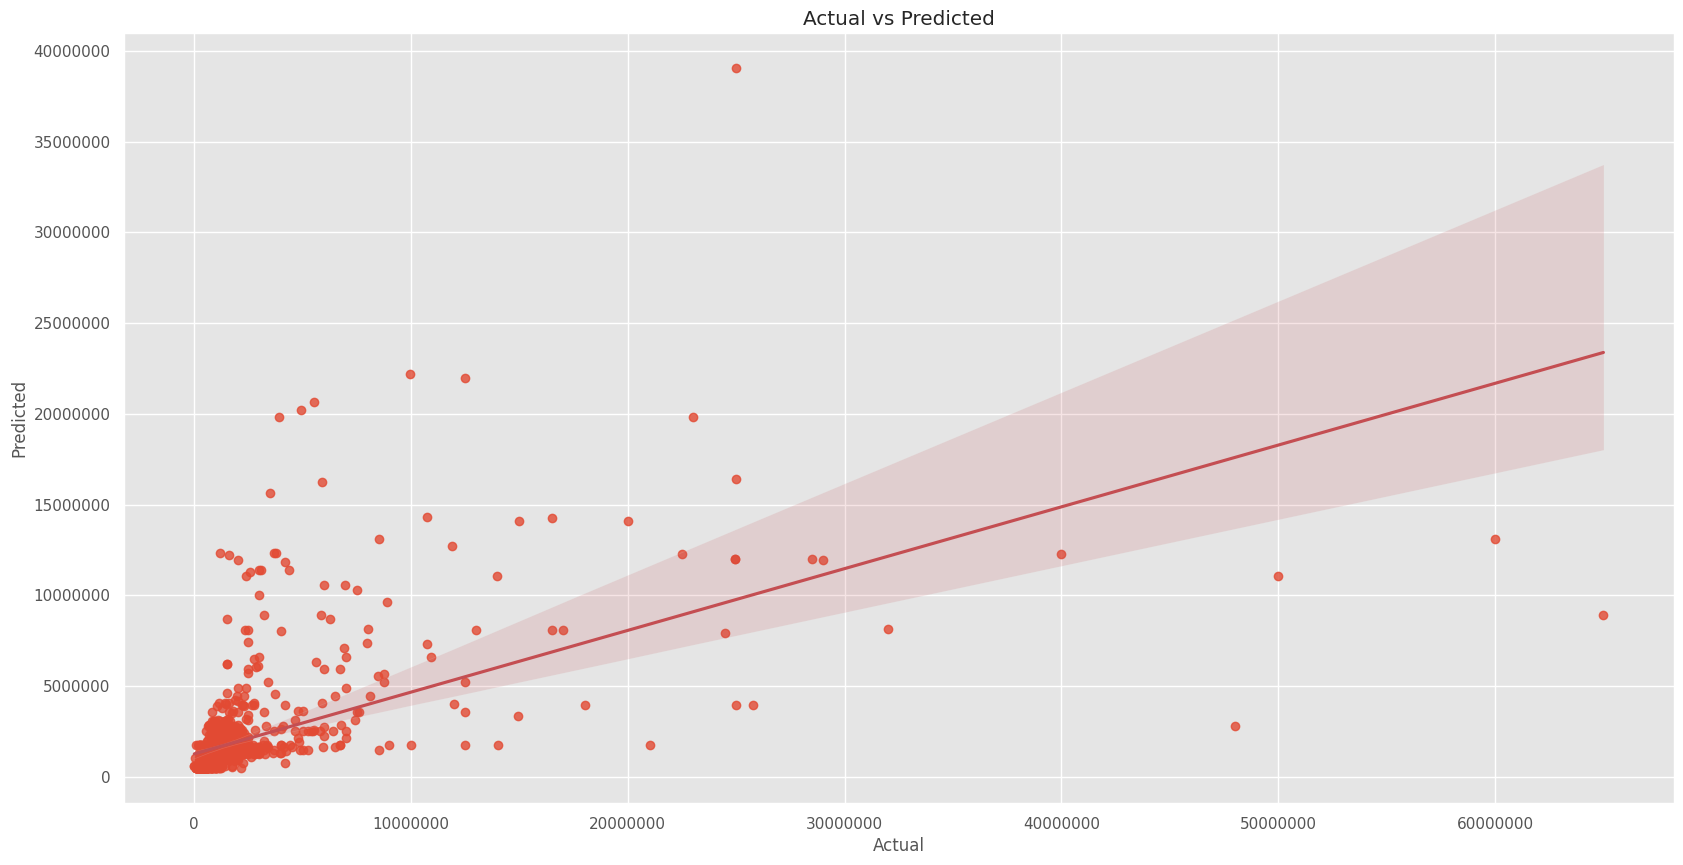

In [10]:
y_preds = clf_xgb_v1.predict(X_test)
fig = plt.figure(figsize=(20, 10))
sns.regplot(data=df, x=y_test, y=y_preds, x_jitter=.15, line_kws=dict(color="r"),)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.ticklabel_format(style = 'plain')